# Visualizing Football

## 1. Plotting shots

### Opening the dataset

use a parser SBopen to retrieve event data from Statsbomb

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch

In [2]:
parser = Sbopen()
match = parser.match(competition_id=16, season_id=1)

In [3]:
match.head()

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
0,18245,2018-05-26,2018-05-26 20:45:00,3,1,available,scheduled,2021-01-23 21:55:30.425330,2021-06-13 16:17:31.694,7,...,26,Final,4222,NSK Olimpiyskyi,238,Ukraine,727,Milorad Mažić,203,Serbia


In [4]:
event, related, freeze, tactics = parser.event(18245)

In [5]:
event.head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,pass_miscommunication,shot_one_on_one,block_offensive,shot_redirect,foul_committed_advantage,foul_won_advantage,pass_goal_assist,foul_committed_card_id,foul_committed_card_name,injury_stoppage_in_chain
0,5eee3ffd-f0c0-4532-868b-4a66cbf20cb8,1,1,00:00:00,0,0,1,0.000000,18245,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,eaa65a92-02d3-4375-b2b7-7c2f679a620c,2,1,00:00:00,0,0,1,0.000000,18245,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9c82d2e5-ebba-4825-b7f9-b11b04433ed8,3,1,00:00:00,0,0,1,0.000000,18245,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b791047a-3eea-452f-b3a9-212bd40cd7cb,4,1,00:00:00,0,0,1,0.000000,18245,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25be91a5-a084-42cb-8cc1-a0fe7b0f52f9,5,1,00:00:00,0,0,2,1.735914,18245,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
team1, team2 = event.team_name.unique()
shots = event[event['type_name']=='Shot'].set_index('id')

### Making the shot map using iterative solution

- use Statsbomb coordinate system
- iterate through all shots, take x,y coordinates, team name, label:
    - if scored, plot a solid circle
    - if not, plot a transculent circle

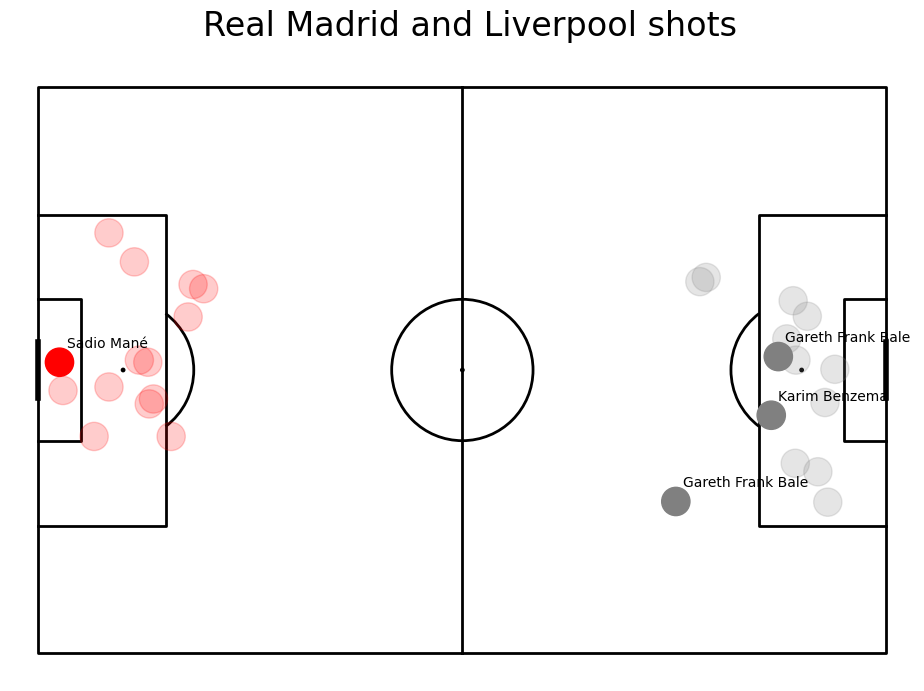

In [16]:
# initiate the pitch
pitch = Pitch('statsbomb',line_color = 'black')
fig,ax = pitch.draw(figsize=(10,7))
pitchlengthX = 120
pitchwidthY = 80
# Plot the shots by looping through them
for i,shot in shots.iterrows():
    # extract all the related columns 
    x=shot['x']
    y=shot['y']
    goal = shot['outcome_name']=='Goal'
    team_name = shot['team_name']
    
    # set circlesize
    circlesize = 2
    
    # plot RM
    if team_name==team1:
        if goal:
            shotCircle = plt.Circle((x,y),circlesize,color='grey')
            plt.text(x+1,y-2,shot['player_name'])
        else:
            shotCircle = plt.Circle((x,y),circlesize,color='grey')
            shotCircle.set_alpha(0.2)
    # plot Liv
    else:
        if goal:
            shotCircle = plt.Circle((pitchlengthX-x,pitchwidthY-y),circlesize,color='red')
            plt.text(pitchlengthX-x+1,pitchwidthY-y-2,shot['player_name'])
        else:
            shotCircle = plt.Circle((pitchlengthX-x,pitchwidthY-y),circlesize,color='red')
            shotCircle.set_alpha(0.2)
    ax.add_patch(shotCircle)

# set title
fig.suptitle('Real Madrid and Liverpool shots', fontsize=24)
fig.set_size_inches(10,7)
plt.show()

### More direct way ---- use mplsoccer's pitch class

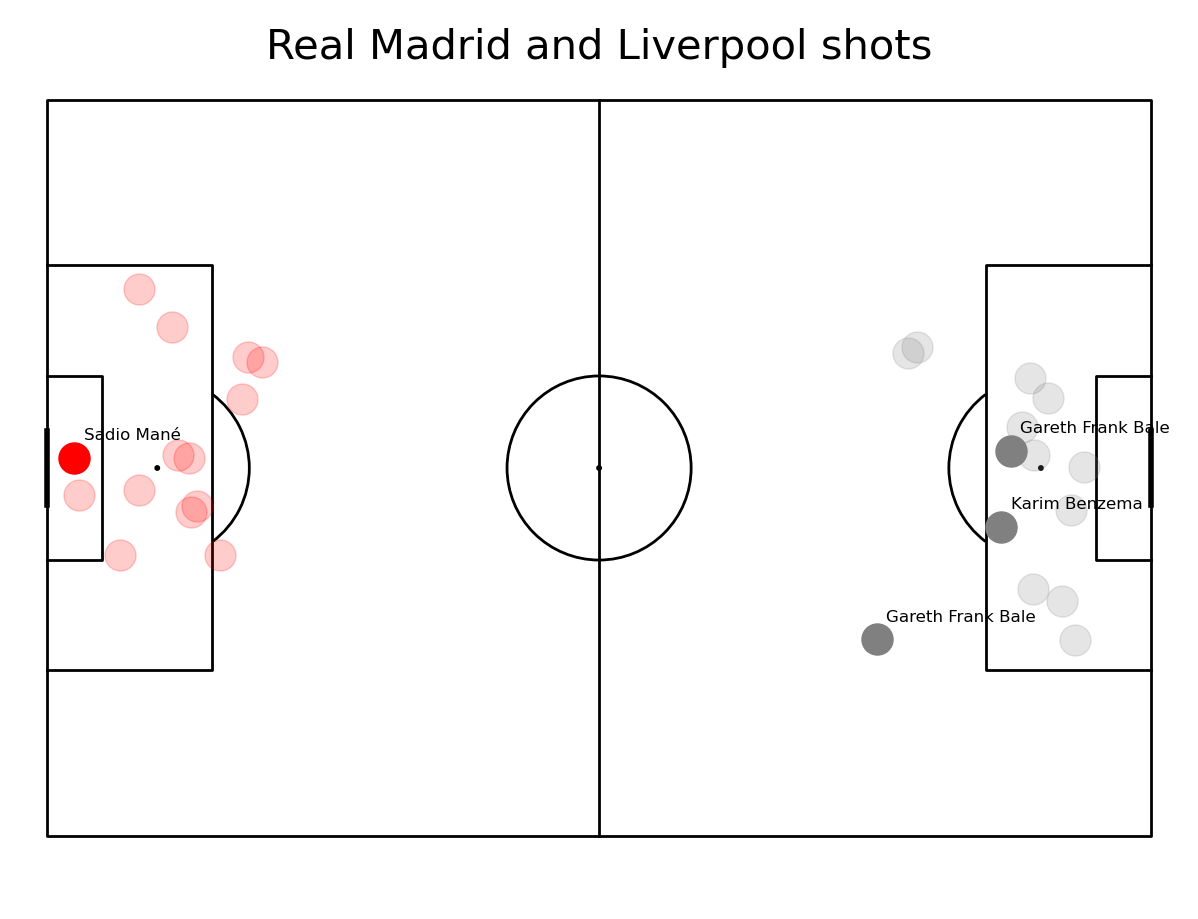

In [20]:
#create pitch
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#query
mask_rm = (event.type_name == 'Shot') & (event.team_name == team1)
#finding rows in the df and keeping only necessary columns
df_rm = event.loc[mask_rm, ['x', 'y', 'outcome_name', "player_name"]]

#plot them - if shot ended with Goal - alpha 1 and add name
#for Real Madrid
for i, row in df_rm.iterrows():
    if row["outcome_name"] == 'Goal':
    #make circle
       pitch.scatter(row.x, row.y, alpha = 1, s = 500, color = "grey", ax=ax['pitch'])
       pitch.annotate(row["player_name"], (row.x + 1, row.y - 2), ax=ax['pitch'], fontsize = 12)
    else:
       pitch.scatter(row.x, row.y, alpha = 0.2, s = 500, color = "grey", ax=ax['pitch'])

mask_liv = (event.type_name == 'Shot') & (event.team_name == team2)
df_liv = event.loc[mask_liv, ['x', 'y', 'outcome_name', "player_name"]]

#for Sweden we need to revert coordinates
for i, row in df_liv.iterrows():
    if row["outcome_name"] == 'Goal':
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'])
       pitch.annotate(row["player_name"], (120 - row.x + 1, 80 - row.y - 2), ax=ax['pitch'], fontsize = 12)
    else:
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 0.2, s = 500, color = "red", ax=ax['pitch'])

fig.suptitle("Real Madrid and Liverpool shots", fontsize = 30)
plt.show()

### Plotting shots on one half

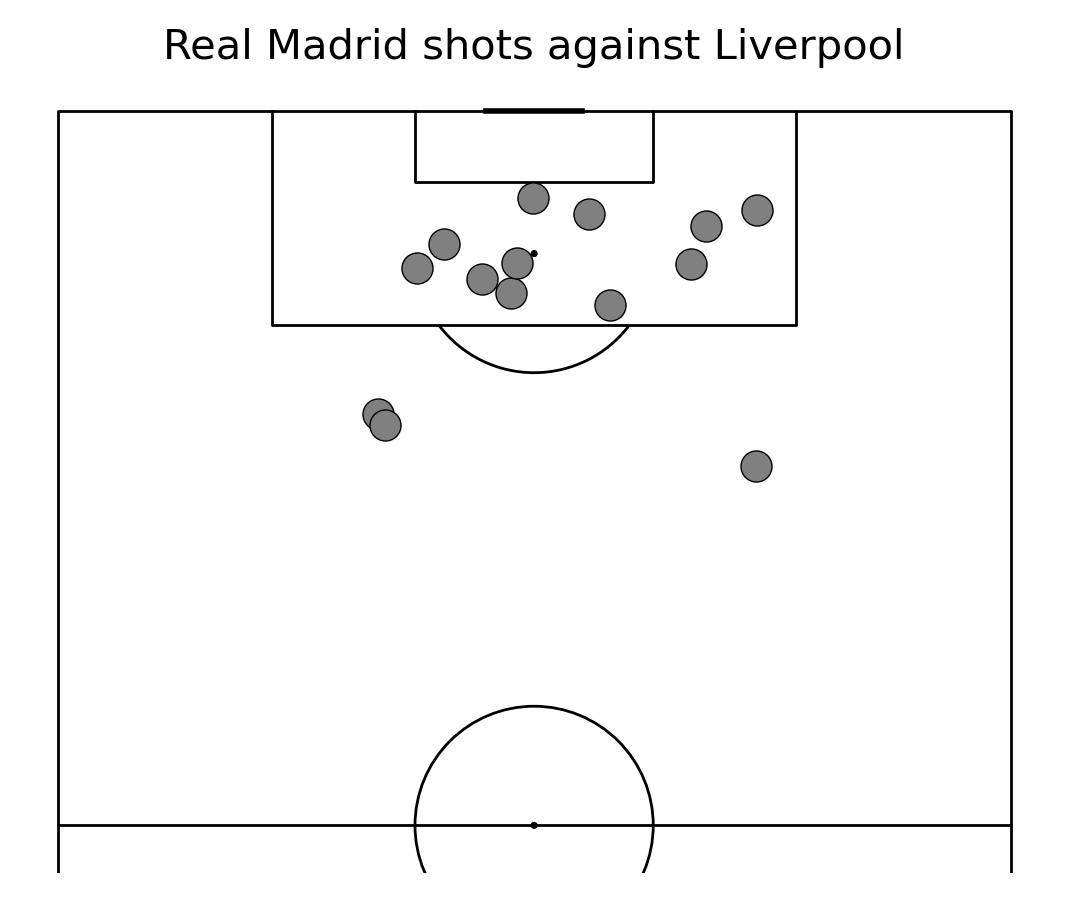

In [21]:
pitch = VerticalPitch(line_color='black', half = True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

pitch.scatter(df_rm.x, df_rm.y, alpha = 1, s=500, color='grey', ax=ax['pitch'],edgecolors= 'black')
fig.suptitle("Real Madrid shots against Liverpool", fontsize = 30)
plt.show()

## 2. Plotting passes

In [10]:
# filter only passes
passes = event.loc[(event['type_name']=='Pass') & (event['type_name'] != 'Throw-in')]

### Iteration method
draw all passes made by Toni Kroos

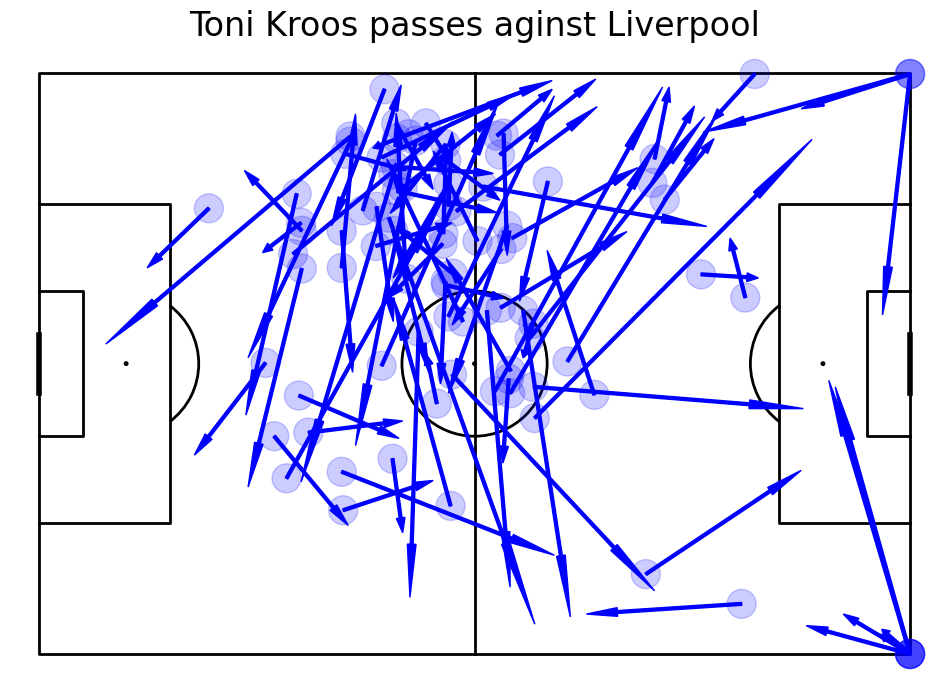

In [12]:
# draw a pitch
pitch = Pitch('statsbomb', line_color = 'black')
fig, ax = pitch.draw(figsize=(10,7))

for i, thepass in passes.iterrows():
    if thepass['player_name']=='Toni Kroos':
        # start point of the pass
        x=thepass['x']
        y=thepass['y']
        # plot circle
        passCircle = plt.Circle((x,y),2,color='blue')
        passCircle.set_alpha(0.2)
        ax.add_patch(passCircle)
        # end point of the pass
        dx = thepass['end_x']-x
        dy = thepass['end_y']-y
        # plot arrow
        passArrow = plt.Arrow(x,y,dx,dy,width=2,color='blue')
        ax.add_patch(passArrow)
        
ax.set_title('Toni Kroos passes aginst Liverpool', fontsize =24)
fig.set_size_inches(10,7)
plt.show()

### using mplsoccer functions

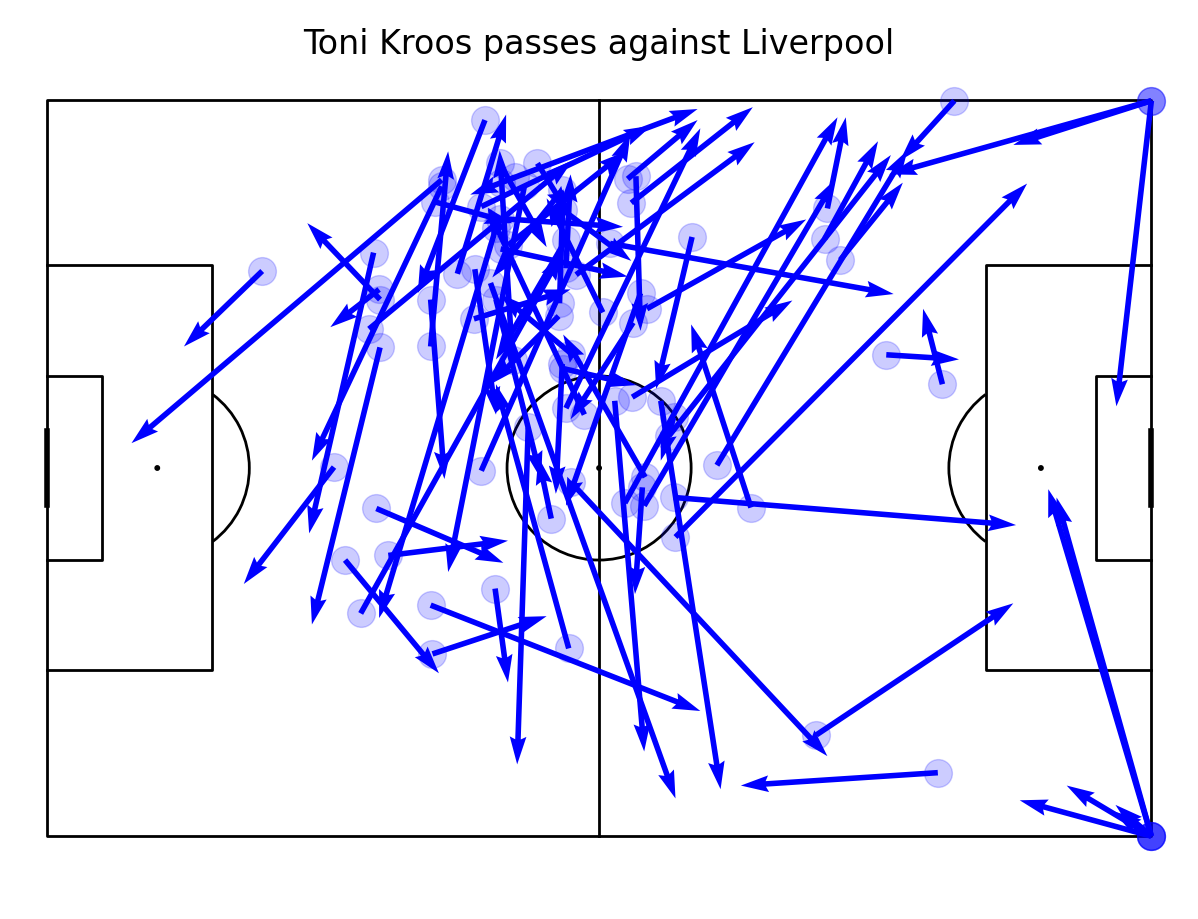

In [16]:
mask_toni = (passes.player_name=='Toni Kroos')
toni_passes = passes.loc[mask_toni,['x','y','end_x','end_y']]

pitch = Pitch('statsbomb', line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

pitch.arrows(toni_passes.x,toni_passes.y,toni_passes.end_x,toni_passes.end_y,color='blue',ax=ax['pitch'])
pitch.scatter(toni_passes.x,toni_passes.y,alpha=0.2,s=400,color='blue',ax=ax['pitch'])
fig.suptitle("Toni Kroos passes against Liverpool", fontsize = 24)
plt.show()

In [14]:
passes['player_name'].unique()

array(['James Philip Milner', 'Dejan Lovren', 'Raphaël Varane',
       'Luka Modrić', 'Daniel Carvajal Ramos', 'Carlos Henrique Casimiro',
       'Jordan Brian Henderson', 'Sadio Mané',
       'Roberto Firmino Barbosa de Oliveira', 'Mohamed Salah',
       'Sergio Ramos García', 'Marcelo Vieira da Silva Júnior',
       'Toni Kroos', 'Cristiano Ronaldo dos Santos Aveiro',
       'Karim Benzema', 'Trent Alexander-Arnold', 'Keylor Navas Gamboa',
       'Francisco Román Alarcón Suárez', 'Virgil van Dijk',
       'Andrew Robertson', 'Georginio Wijnaldum', 'Loris Karius',
       'Adam David Lallana', 'José Ignacio Fernández Iglesias',
       'Gareth Frank Bale', 'Emre Can', 'Marco Asensio Willemsen'],
      dtype=object)

### Plotting multiple pass maps on one figure

The midfield trio ---- Modric, Kroos and Casemiro

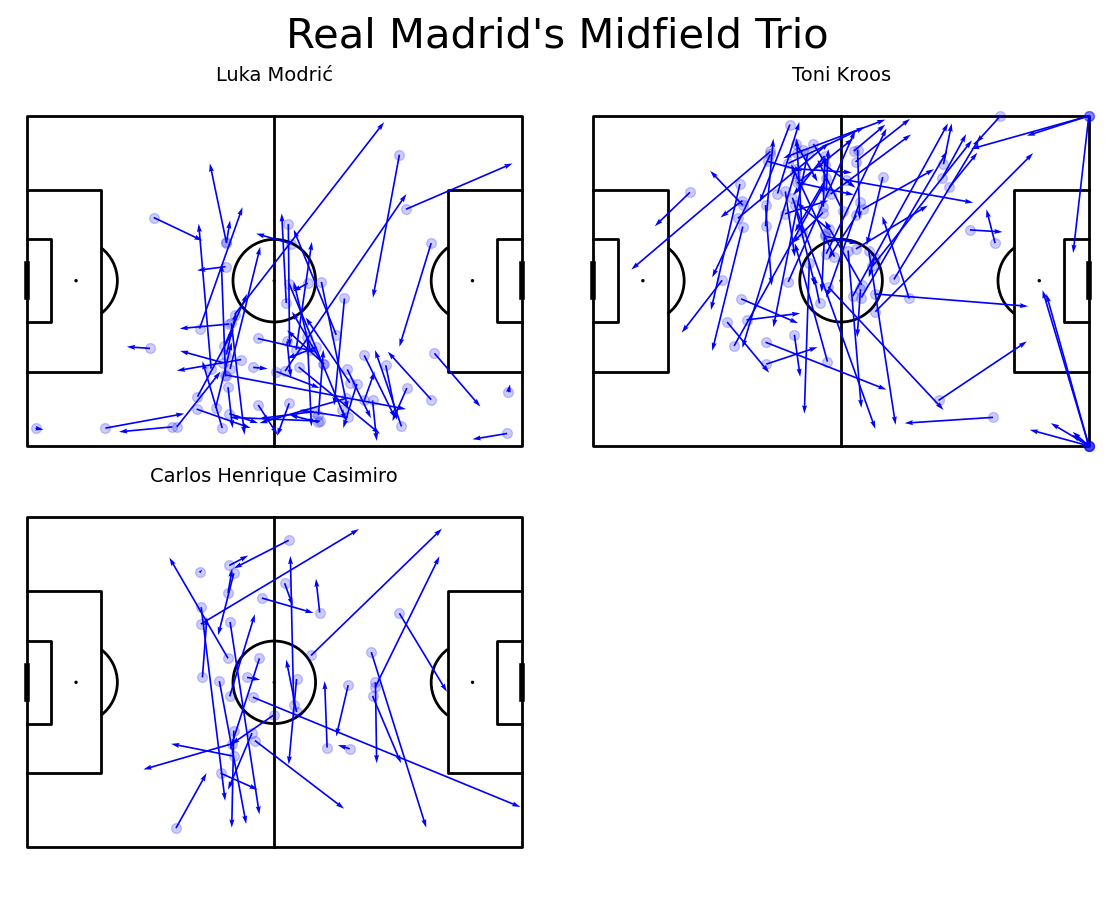

In [28]:
names = ['Luka Modrić','Toni Kroos','Carlos Henrique Casimiro']
df_passes = passes[['x','y','end_x','end_y','player_name']]

# draw 2x2 pitches
pitch = Pitch('statsbomb', line_color='black')
fig, axs = pitch.grid(ncols = 2, nrows = 2, grid_height=0.85, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0.04, endnote_space=0.01)

# for each player
for name,ax in zip(names, axs['pitch'].flat[:len(names)]):
    ax.text(60,-10,name,ha='center',va='center',fontsize=14)
    
    player_df = df_passes.loc[df_passes['player_name']==name]
    # scatter and arrow
    pitch.arrows(player_df.x,player_df.y,player_df.end_x,player_df.end_y,color='blue',ax=ax, width=1.2)
    pitch.scatter(player_df.x,player_df.y,alpha=0.2,s=50,color='blue',ax=ax)
    
# We have more than enough pitches - remove them
for ax in axs['pitch'][-1, 4 - len(names):]:
    ax.remove()

# Another way to set title using mplsoccer
axs['title'].text(0.5, 0.5, 'Real Madrid\'s Midfield Trio', ha='center', va='center', fontsize=30)
plt.show()